# Sheet 05

Welcome to Sheet 05

### Task 5.1

- a)

In [1]:
from sympy import Matrix, sqrt, cos, sin, I, pi
from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
import matplotlib.pyplot as plt

> Test where $|\psi\rangle=\frac1{\sqrt{2}}(|00\rangle+|11\rangle)$ violates the CHSH inequality $|\langle S_1\rangle|\leq2$ for $\theta\in(0,2\pi)$ with a reasonable $\operatorname{discretization}.$ $$S_1=A(B+B')-A'(B-B')=AB+AB'-A'B+A'B'$$
> $$|\langle S_1\rangle|=|\langle AB\rangle+\langle AB^{\prime}\rangle-\langle A^{\prime}B\rangle+\langle A^{\prime}B^{\prime}\rangle|\leq2$$
> Create a plot where you plot $|\langle S_1(\theta)\rangle|$ with $\theta$ on the x-axis and $|\langle S_1\rangle|$ on the y-axis.

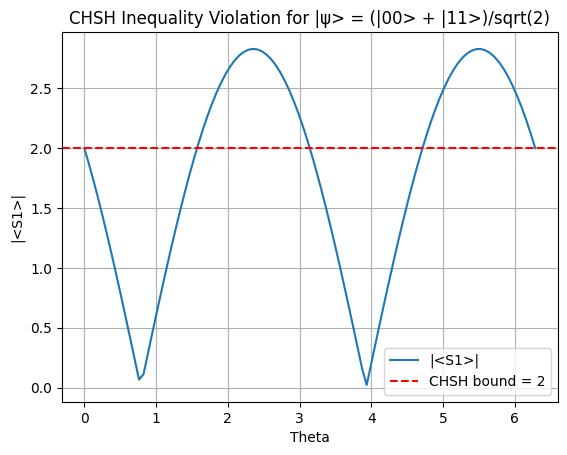

In [2]:

# Define Pauli matrices
Z = Matrix([[1, 0], [0, -1]])
X = Matrix([[0, 1], [1, 0]])
Y = Matrix([[0, -I], [I, 0]])

# Define rotation matrix R_Y(theta)
def R_Y(theta):
    return Matrix([[cos(theta/2), -sin(theta/2)], [sin(theta/2), cos(theta/2)]])

# Define rotated measurement bases
def B(theta):
    return R_Y(theta) * Z * Dagger(R_Y(theta))

def B_prime(theta):
    return R_Y(theta) * X * Dagger(R_Y(theta))

# Bell state |psi> = 1/sqrt(2) (|00> + |11>)
psi = 1/sqrt(2) * Matrix([1, 0, 0, 1])

# Define expectation value <psi|O|psi>
def expectation(O):
    return (Dagger(psi) * O * psi)[0]

# Define tensor products of the measurement operators
def get_AB_matrices(theta):
    A = Z
    A_prime = X
    B_theta = B(theta)
    B_prime_theta = B_prime(theta)
    
    AB = TensorProduct(A, B_theta)
    AB_prime = TensorProduct(A, B_prime_theta)
    A_primeB = TensorProduct(A_prime, B_theta)
    A_primeB_prime = TensorProduct(A_prime, B_prime_theta)
    
    return AB, AB_prime, A_primeB, A_primeB_prime

# Compute S_1 for a given theta
def compute_S1(theta):
    AB, AB_prime, A_primeB, A_primeB_prime = get_AB_matrices(theta)
    
    S1 = (expectation(AB) + expectation(AB_prime) - expectation(A_primeB) + expectation(A_primeB_prime)).evalf()
    return abs(S1)

# Discretize theta and compute S1 values
theta_values = np.linspace(0, 2 * np.pi, 100)
S1_values = [compute_S1(theta) for theta in theta_values]

# Plotting the results
plt.plot(theta_values, S1_values, label='|<S1>|')
plt.axhline(y=2, color='r', linestyle='--', label='CHSH bound = 2')
plt.xlabel('Theta')
plt.ylabel('|<S1>|')
plt.title('CHSH Inequality Violation for |ψ> = (|00> + |11>)/sqrt(2)')
plt.legend()
plt.grid(True)
plt.show()


> $\text{ Find a }S_2\text{ that violates }|\langle S_2(\theta)\rangle|\leq2$

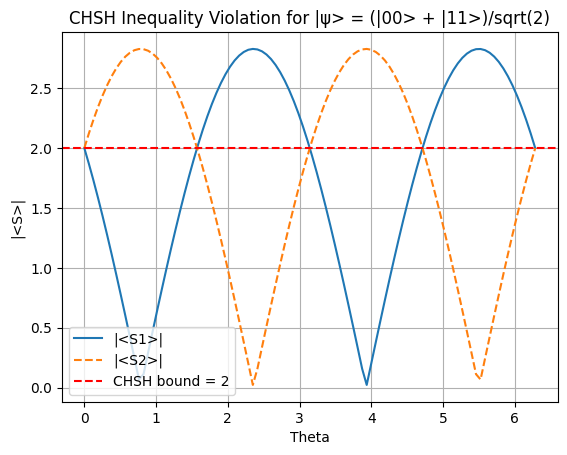

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, sqrt, cos, sin, I, pi
from sympy.physics.quantum import TensorProduct, Dagger

# Define Pauli matrices
Z = Matrix([[1, 0], [0, -1]])
X = Matrix([[0, 1], [1, 0]])
Y = Matrix([[0, -I], [I, 0]])

# Define rotation matrix R_Y(theta)
def R_Y(theta):
    return Matrix([[cos(theta/2), -sin(theta/2)], [sin(theta/2), cos(theta/2)]])

# Define rotated measurement bases
def B(theta):
    return R_Y(theta) * Z * Dagger(R_Y(theta))

def B_prime(theta):
    return R_Y(theta) * X * Dagger(R_Y(theta))

# Bell state |psi> = 1/sqrt(2) (|00> + |11>)
psi = 1/sqrt(2) * Matrix([1, 0, 0, 1])

# Define expectation value <psi|O|psi>
def expectation(O):
    return (Dagger(psi) * O * psi)[0]

# Define tensor products of the measurement operators
def get_AB_matrices(theta):
    A = Z
    A_prime = X
    B_theta = B(theta)
    B_prime_theta = B_prime(theta)
    
    AB = TensorProduct(A, B_theta)
    AB_prime = TensorProduct(A, B_prime_theta)
    A_primeB = TensorProduct(A_prime, B_theta)
    A_primeB_prime = TensorProduct(A_prime, B_prime_theta)
    
    return AB, AB_prime, A_primeB, A_primeB_prime

# Compute S1 for a given theta
def compute_S1(theta):
    AB, AB_prime, A_primeB, A_primeB_prime = get_AB_matrices(theta)
    
    S1 = (expectation(AB) + expectation(AB_prime) - expectation(A_primeB) + expectation(A_primeB_prime)).evalf()
    return abs(S1)

# Compute S2 for a given theta
def compute_S2(theta):
    AB, AB_prime, A_primeB, A_primeB_prime = get_AB_matrices(theta)
    
    S2 = (expectation(AB) - expectation(AB_prime) + expectation(A_primeB) + expectation(A_primeB_prime)).evalf()
    return abs(S2)

# Discretize theta and compute S1 and S2 values
theta_values = np.linspace(0, 2 * np.pi, 100)
S1_values = [compute_S1(theta) for theta in theta_values]
S2_values = [compute_S2(theta) for theta in theta_values]

# Plotting the results
plt.plot(theta_values, S1_values, label='|<S1>|')
plt.plot(theta_values, S2_values, label='|<S2>|', linestyle='--')
plt.axhline(y=2, color='r', linestyle='--', label='CHSH bound = 2')
plt.xlabel('Theta')
plt.ylabel('|<S>|')
plt.title('CHSH Inequality Violation for |ψ> = (|00> + |11>)/sqrt(2)')
plt.legend()
plt.grid(True)
plt.show()


### Task 5.2

- a)

In [4]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

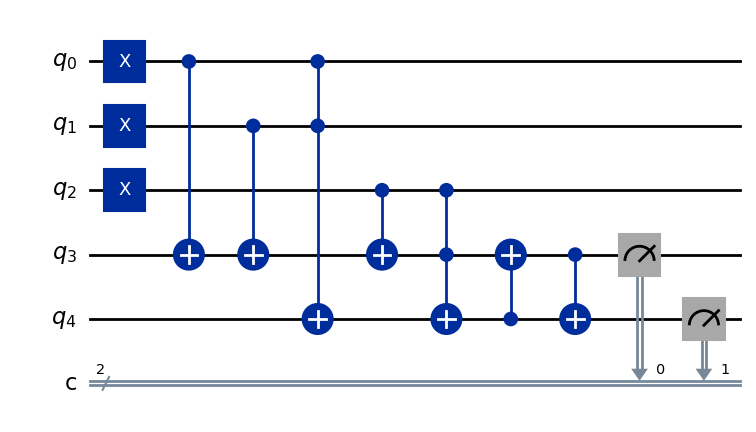

In [5]:
qc = QuantumCircuit(5, 2)

# Initialize input qubits (example: a=1, b=1, c=1)
qc.x(0)  # a = 1
qc.x(1)  # b = 1
qc.x(2)  # c = 1

# First Half Adder
qc.cx(0, 3)  # XOR for sum1 = a ^ b
qc.cx(1, 3)  # XOR for sum1 = a ^ b
qc.ccx(0, 1, 4)  # AND for carry1 = a & b

# Second Half Adder
qc.cx(2, 3)  # XOR for sum2 = sum1 ^ c
qc.ccx(2, 3, 4)  # AND for carry2 = sum1 & c

# Combine carries (final carry)
# Apply OR operation by XOR and AND (carry1 OR carry2)
qc.cx(4, 3)   # Final carry using XOR for carry1 OR carry2
qc.cx(3, 4)

# Measure the output
qc.measure(3, 0)  # Measure sum
qc.measure(4, 1)  # Measure carry

# Draw the circuit
qc.draw('mpl')


- b)

Measurement Result: {'11': 1024}


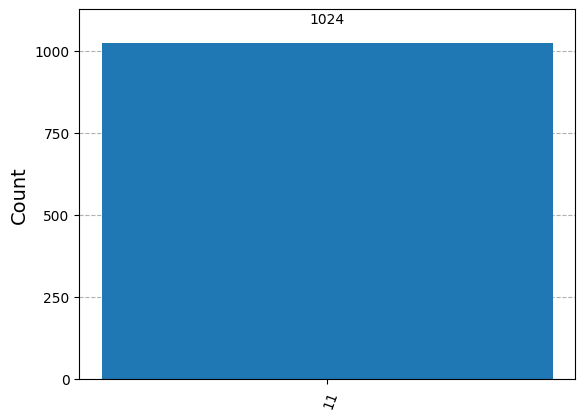

In [6]:

sim = AerSimulator()
result = sim.run(qc).result()

counts = result.get_counts(qc)
print("Measurement Result:", counts)

plot_histogram(result.get_counts(0))

- c)

The circuit yield the expected result {'11': 1024} for the inputs 𝑎= 1,  𝑏 = 1, and  𝑐 = 1.

We can verify the correctness by comparing the measured output with the expected output which should be should be $s=1$ and $c=1$.